In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
print(tf.__version__)

2.2.0


In [3]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [4]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat'
            'Sandal','shirt','Sneaker','Bag','Ankle boot']

In [5]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [6]:
print('Training Data Shape:',train_images.shape,train_labels.shape)
print('Test Data Shape:',test_images.shape,test_labels.shape)



Training Data Shape: (60000, 28, 28) (60000,)
Test Data Shape: (10000, 28, 28) (10000,)


In [7]:
def showtrainingimage(index):
  img_label = str(train_labels[index]) + ' (' +  class_names[train_labels[index]] + ')'
  plt.figure()
  plt.title('Image Label ' + img_label) 
  plt.imshow(train_images[index], cmap='gray')  # data is grayscale, but displays in color without cmap='gray'
  plt.colorbar()
  plt.show()



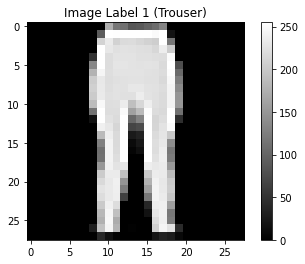

In [19]:
index=80
showtrainingimage(index)

# Scaling pixel values from 0 to 255 to 0 to 1

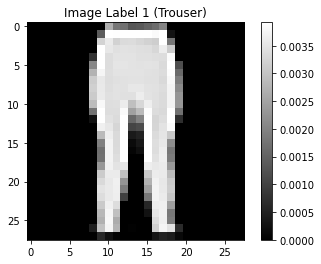

In [21]:
test_images=test_images / 255.0
train_images=train_images / 255.0
showtrainingimage(index)

In [22]:
model = tf.keras.models.Sequential()      # Create a new sequential model
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))    # flatten layer has  no neurons
model.add(tf.keras.layers.Dense(128, activation='relu', name='dense-128-relu'))   # 128 neurons connected to pixels
model.add(tf.keras.layers.Dense(10, activation='softmax', name='dense-10-softmax')) # determines probability of each of the 10 classes



In [23]:
train_images.shape

(60000, 28, 28)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense-128-relu (Dense)       (None, 128)               100480    
_________________________________________________________________
dense-10-softmax (Dense)     (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])



In [26]:
train_hist = model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 24s 13ms/step - loss: 1.1101 - accuracy: 0.6544
Epoch 2/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.6518 - accuracy: 0.7664
Epoch 3/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.5752 - accuracy: 0.7930
Epoch 4/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5316 - accuracy: 0.8107
Epoch 5/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.5025 - accuracy: 0.8230
Epoch 6/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4822 - accuracy: 0.8301
Epoch 7/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4663 - accuracy: 0.8358
Epoch 8/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4541 - accuracy: 0.8405
Epoch 9/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4438 - accuracy: 0.8441
Epoch 10/20
1875/1875 [==============================] - 24s 13m

In [27]:
def plot_acc(hist):
  # plot the accuracy
  plt.title('Accuracy History')
  plt.plot(hist.history['accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.show()
  
def plot_loss(hist):
  # plot the loss
  plt.title('Loss History')
  plt.plot(hist.history['loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.show()

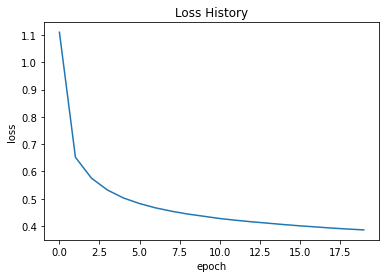

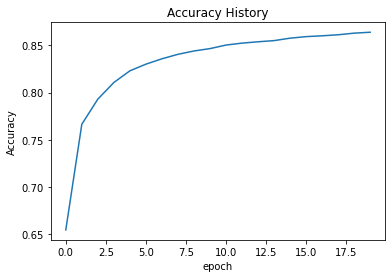

In [28]:
plot_loss(train_hist)
plot_acc(train_hist)


In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

print('max training accuracy:', max(train_hist.history['accuracy']), '  test accuracy:', test_acc)

max training accuracy: 0.8639166951179504   test accuracy: 0.8482999801635742
